Today we will continue this semester's project. To download last week's notebook, click [here](https://drive.google.com/open?id=0B3D_PdrFcBfRQjBfUGZaMFF2Mlk).

### Reference Bank

Other links referenced today:
* [538 - Political statistics](http://fivethirtyeight.com/)
* [How to apply for Twitter API key](https://apps.twitter.com/)
* [Twitter advanced search engine](https://twitter.com/search-advanced?lang=en)
* [Tweepy documentation](http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html#api)
* [Twitter API documentation](https://dev.twitter.com/rest/reference)

**Our Twitter key: Q8kC59z8t8T7CCtIErEGFzAce**

In [1]:
## Import required libraries
import tweepy
import json

In [2]:
## NOTE: Better to use your own keys and tokens!!
## Our access key, mentioned above
consumer_key = 'Q8kC59z8t8T7CCtIErEGFzAce'
## Our signature, also given upon app creation
consumer_secret = '24bbPpWfjjDKpp0DpIhsBj4q8tUhPQ3DoAf2UWFoN4NxIJ19Ja'
## Our access token, generated upon request
access_token = '719722984693448704-lGVe8IEmjzpd8RZrCBoYSMug5uoqUkP'
## Our secret access token, also generated upon request
access_token_secret = 'LrdtfdFSKc3gbRFiFNJ1wZXQNYEVlOobsEGffRECWpLNG'

## Set of Tweepy authorization commands
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Now let's create a search query. The Tweepy API object has a *search* method that takes in a parameters *q*, which is our search query. The search query is a string that specifies what kind of tweets we want to search for. The documentation for query operators, which define what you'd like to search for, can be found [here]( https://dev.twitter.com/rest/public/search). The Twitter [advanced search engine](https://twitter.com/search-advanced?lang=en) also provides an easy way to build complex queries.

For example, if we want to search for tweets about Hillary with the hashtag "Imwithher":

In [3]:
# We first need to create our search query string, using either the query operator documentation, 
# or the Twitter advanced search enginer:
query = "%20hillary%23imwithher"

# We now use the api object's search method to find the tweets that match the query:
results = api.search(query)

# Now, let's see the results. The results will be a list of SearchResult objects. Let's look at the first result in the list:
print(results[0])

Status(geo=None, is_quote_status=False, user=User(verified=False, utc_offset=None, entities={'description': {'urls': []}}, profile_banner_url='https://pbs.twimg.com/profile_banners/564077913/1473222620', followers_count=244, url=None, is_translation_enabled=False, location="CHS'17", created_at=datetime.datetime(2012, 4, 26, 19, 58, 53), default_profile_image=False, profile_use_background_image=True, statuses_count=6971, protected=False, favourites_count=207, profile_background_color='ACDED6', is_translator=False, profile_text_color='333333', profile_link_color='038543', _json={'default_profile': False, 'geo_enabled': True, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme18/bg.gif', 'utc_offset': None, 'entities': {'description': {'urls': []}}, 'listed_count': 2, 'profile_background_color': 'ACDED6', 'verified': False, 'followers_count': 244, 'url': None, 'friends_count': 862, 'is_translation_enabled': False, 'location': "CHS'17", 'created_at': 'Thu Apr 26 19:58

That's a lot of text. Let's convert the first results to JSON (which in Python, acts as a dictionary) and use [JSON Pretty Print](http://jsonprettyprint.com/) to better visualize the results:

In [4]:
# Let's convert the first result to JSON:
status = results[0]
# This here is the data as a dictionary:
dictionary = status._json

If you print them, the look about the same, but are slightly different. To actually access the data, we'd need to use the data in the dictionary. But if we only want to more clearly visualize how the data is structured, we can used JSON Pretty Print. To use it, we have to use the JSON string. Try pasting the [JSON](https://docs.python.org/3/library/json.html) string below into Pretty Print:

In [5]:
# And this is the data as a JSON string.
json_str = json.dumps(status._json)
print(json_str)

{"geo": null, "is_quote_status": false, "user": {"default_profile": false, "geo_enabled": true, "profile_background_image_url": "http://abs.twimg.com/images/themes/theme18/bg.gif", "utc_offset": null, "entities": {"description": {"urls": []}}, "listed_count": 2, "profile_background_color": "ACDED6", "verified": false, "followers_count": 244, "url": null, "friends_count": 862, "is_translation_enabled": false, "location": "CHS'17", "created_at": "Thu Apr 26 19:58:53 +0000 2012", "default_profile_image": false, "profile_use_background_image": true, "profile_sidebar_fill_color": "F6F6F6", "name": "Bidhya", "statuses_count": 6971, "profile_image_url": "http://pbs.twimg.com/profile_images/773377833297207297/3nN92VcM_normal.jpg", "profile_link_color": "038543", "following": false, "id": 564077913, "protected": false, "lang": "en", "notifications": false, "favourites_count": 207, "screen_name": "bidhya_mainali", "is_translator": false, "description": "Human rights are women's rights, and women

### Analyzing and visualizing data

Now we'll explore data from the tweets using two Python libraries that are commonly used in data analysis, NumPy and Matplotlib.

In [8]:
%matplotlib inline
import matplotlib
import numpy as np # Abbreviation to make future use easier
import matplotlib.pyplot as plt

**NumPy**

NumPy is a scientific computing library that provides functions to make it easy to perform computations on data without worrying about the underlying algorithm (think matrix multiplication, list sorting, polynomial fitting, etc.). It's based around "ndarray" objects (*n*-dimensional arrays) that are very similar to the Python lists we're already familiar with. The NumPy documentation, which can be found [here](https://docs.scipy.org/doc/numpy-1.11.0/reference/), provides a good explanation of its capabilites.

Let's see some basic examples of what NumPy can do:

In [9]:
# Create a Python list
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a NumPy array from that list
arr = np.array(lst)

Let's say we want to add 5 to each number in the list, multiply each number by 10, and then
find the sum of all numbers in the list.

In [10]:
# Using only Python, it would look something like this:
new_lst = []
for i in range(len(lst)):
    new_lst.append((lst[i] + 5) * 10)
lst_sum = sum(new_lst)
print("lst_sum: " + str(lst_sum))

# With NumPy, it would be:
array_sum = np.sum((arr + 5) * 10)
print("array_sum: " + str(array_sum))

lst_sum: 1050
array_sum: 1050


Using the same list and array, let's find the numbers in the list that are either even or greater than 5.

In [13]:
# Python only code:
new_lst = []
for num in lst:
    if num % 2 == 0 or num > 5:
        new_lst.append(num)
print("new_lst: " + str(new_lst))
        
# NumPy code:
boolean_array = (arr > 5) | (arr % 2 == 0)
new_array = arr[boolean_array]
print("array: " + str(arr))
print("new_array: " + str(new_array))
print("boolean_array: " + str(boolean_array))

new_lst: [2, 4, 6, 7, 8, 9, 10]
array: [ 1  2  3  4  5  6  7  8  9 10]
new_array: [ 2  4  6  7  8  9 10]
boolean_array: [False  True False  True False  True  True  True  True  True]


As you can see, we get the same result with NumPy using fewer and less complicated lines of code. This is a really basic example, but the advantage of using NumPy becomes even more clear with more complicated calculations.

*The most important thing to get out of this section:* Use NumPy arrays are very similar to Python lists, but as we will see in the following question, they are more compatible with the Matplotlib package. If you understand how to create a NumPy array, it will make graphing exercises easier. So, create a NumPy array below (and don't overthink it!):

In [14]:
# First, create a Python list.
num_lst = [3, 4, 5, 6, 6, 7, 8, 8, 9, 12]
# Then, create a NumPy array using that list (as above)
num_arr = np.array(num_lst)

**Matplotlib**

Matplotlib is another Python library that makes is easy to visualize data. You can create almost any kind of plot with Matplotlib: line graphs, box plots, heatmaps, 3D scatter plots, histograms, etc. The documentation, which you can find [here](http://matplotlib.org/contents.html) is also pretty good.

Matplotlib and NumPy are often used together. They don't have to be, but they do complement each other well.

Here are a few examples:

First, we will make some fake data to plot. To create a plot, we will pass in an array of x values and another array of corresponding y values. Here is an example:

In [15]:
# Here's some fake data:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 5, 3, 6, 5, 8, 7, 7, 8, 9])

Let's make a plot! Matplotlib will create the figure, you just have to give it data, and then specify additional parameters if you'd like. The only required parameters for creating a plot are the x and y arrays described above. We will start with the most basic plot available:

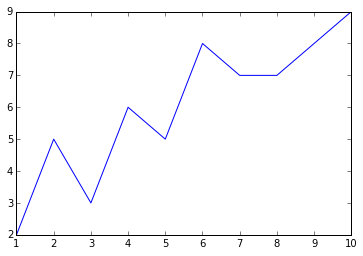

In [16]:
# The most basic plot possible - a line graph
plt.plot(x, y)

Now let's open up the [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html) to learn a little bit about what the "plot()" command takes in. Once you've read up, take the same data and make a scatter plot *using the plot() function.*

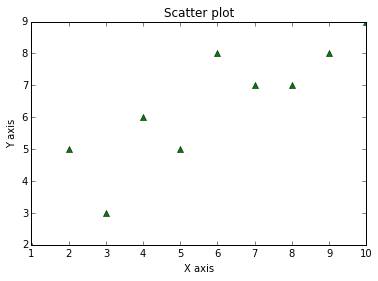

In [22]:
# A scatter plot with the above data
plt.plot(x, y, "g^")
plt.title("Scatter plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")

And now a bar graph:

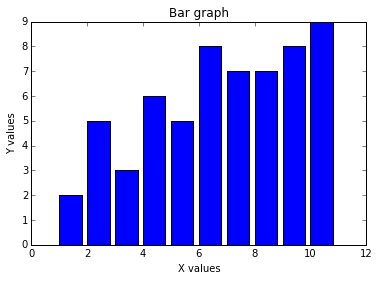

In [23]:
# A bar graph, with the same data
plt.bar(x, y)
plt.title("Bar graph")
plt.xlabel("X values")
plt.ylabel("Y values")

Let's make it 3D!

In [24]:
# We first need to import an add-on library for 3D graphing:
from mpl_toolkits.mplot3d import Axes3D

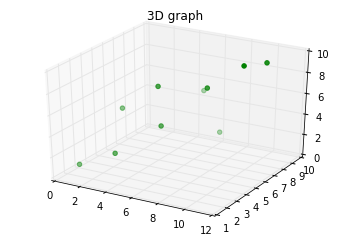

In [25]:
# Make data for the z axis:
z = np.array([1, 5, 2, 7, 4, 6, 7, 3, 9, 9])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='green')
plt.title("3D graph")

Take 5 minutes to create a graph of your own, even if it means making up data and pattern-matching. We want you to get a feel for what it's like to create your own graph. Here's template code if you want help getting started:

In [41]:
x_values = np.array(range(0, 100)) # Fill in with numpy array
x_values2 = np.arange(0, 100) # same output as above

rand_nums = np.random.random_integers(0, 10, 5)
print(rand_nums)
# y_values = _______ # Fill in with nump array

# plt.plot(___, ___) # Fill in with parameters

# Feel free to specify other things about your plot! For example,
# give it a title and label the axes.
print(x_values)
print(x_values2)

[ 3 10  4  6  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


### Twitter Data Analysis

Now we'll explore some of the data we get from the Twitter API using NumPy and Matplotlib. Let's look at the difference in attitudes to the former presidential candidats by location in the US. First, we need to construct a query. An easy way to do so is to use Twitter's [advanced search engine](https://twitter.com/search-advanced?lang=en).

In [50]:
# Search for tweets containing a positive attitude to 'hillary' or 'clinton' since October 1st
query1 = "hillary%20OR%20clinton%20%3A%29"

# Search for tweets containing a positive attitude to 'donald' or 'trump' since October 1st
query2 = "donald%20OR%20trump%20%3A%29"

results1 = api.search(query1)
results2 = api.search(query2)

In [51]:
print(results1)

[Status(geo=None, is_quote_status=False, user=User(verified=False, utc_offset=None, entities={'description': {'urls': []}}, profile_banner_url='https://pbs.twimg.com/profile_banners/1243785780/1478201800', followers_count=810, url=None, is_translation_enabled=False, location='', created_at=datetime.datetime(2013, 3, 5, 13, 57, 38), default_profile_image=False, profile_use_background_image=True, statuses_count=31836, protected=False, favourites_count=3946, profile_background_color='C0DEED', is_translator=False, profile_text_color='333333', profile_link_color='1DA1F2', _json={'default_profile': True, 'geo_enabled': True, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'utc_offset': None, 'entities': {'description': {'urls': []}}, 'listed_count': 7, 'profile_background_color': 'C0DEED', 'verified': False, 'followers_count': 810, 'url': None, 'friends_count': 473, 'is_translation_enabled': False, 'location': '', 'created_at': 'Tue Mar 05 13:57:38 +0000 2

Remember from last time that each status has a `_json` attribute that contains a portion of data similar to a Python dictionary. We will be analyzing these sub-dictionaries for data.

In the next block of code, we will want to put the `_json` dictionary from the status into a list that corresponds with the query.

In [52]:
# Get the JSON portion from each result
# Remember: JSON is like a Python dictionary. Store these dictionaries to lists.
lst_1 = []
for i in range(len(results1)):
    status = results1[i] # What variable do we want to use to index in the list?
    dictionary = status._json
    lst_1.append(dictionary) # What function would we use to add the dictionary to the list?
    
lst_2 = []
for i in range(len(results2)):
    status = results2[i] # Same as above
    dictionary = status._json
    lst_2.append(dictionary) # Same as above

We now have a list of results for both queries. Let's look at how many retweets each tweet has:

Hillary's retweets: [  467  3334     7 12477  9356     2     2   265  1062   238  9353   167
     2   527     9]
Donald's retweets: [  7 890   0   0 198  42   0   0   0 629 157  44   8 167 386]


[<matplotlib.text.Text at 0x109995128>, <matplotlib.text.Text at 0x1099808d0>]

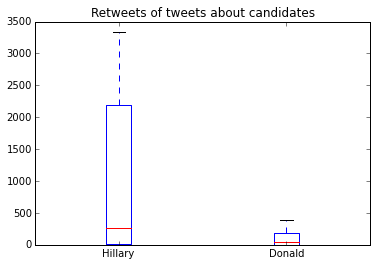

In [53]:
retweets1 = []
retweets2 = []

for item in lst_1:
    # Access the value that corresponds with the "retweet_count" key in the dictionary
    # Add that value to the list
    retweets1.append(item["retweet_count"])

for item in lst_2:
    retweets2.append(item["retweet_count"])

retweets1 = np.array(retweets1) # Create array
retweets2 = np.array(retweets2)

print("Hillary's retweets: " + str(retweets1))
print("Donald's retweets: " + str(retweets2))

# Boxplot of retweets of tweets, by candidate
fig, axis = plt.subplots()
plt.boxplot([retweets1, retweets2], showfliers=False)
plt.title("Retweets of tweets about candidates") # Setting title
axis.set_xticklabels(["Hillary", "Donald"])

Now let's compare how active on Twitter Hillary tweeters are vs. Donald tweeters. Let's look at two data points: the number of tweets on a user's page and the number of followers a user has.

We will graph the results for Hillary in blue, and Donald in red.

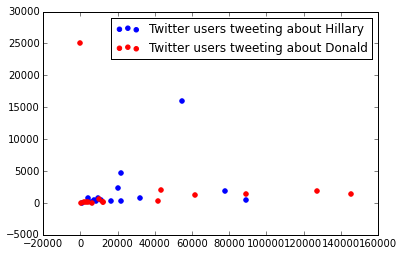

In [54]:
hillary_num_tweets = []
hillary_num_followers = []
for item in lst_1:
    hillary_num_tweets.append(item["user"]["statuses_count"])
    hillary_num_followers.append(item["user"]["followers_count"])

donald_num_tweets = []
donald_num_followers = []
for item in lst_2:
    donald_num_tweets.append(item["user"]["statuses_count"])
    donald_num_followers.append(item["user"]["followers_count"])
    
# A scatter plot of the data
plt.scatter(hillary_num_tweets, hillary_num_followers, color='blue', label='Twitter users tweeting about Hillary')
plt.scatter(donald_num_tweets, donald_num_followers, color='red', label='Twitter users tweeting about Donald')
plt.legend()

The above graphs are both pretty complex. Now take the rest of our time to construct a graph that takes in some data from the API. Have fun and ask questions!